In [33]:
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
from espncricinfo.match import Match

In [126]:
def get_player_table(player_id, table_type='batting'):
    url = f"https://stats.espncricinfo.com/ci/engine/player/{player_id}.html?class=1;template=results;type={table_type};view=innings"
    r = requests.get(url)
    if r.status_code == 404:
        raise PlayerNotFoundError
    else:
        soup = BeautifulSoup(r.text, 'html.parser')
        tables = soup.findAll('table', class_='engineTable')
        table = pd.read_html(str(tables[3]))[0]
        return table


In [129]:
get_player_table(267192, 'fielding')

,Dis,Ct,St,Ct Wk,Ct Fi,Inns,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10
0,1,1,0,0,1,2,NaN,v Pakistan,Lord's,13 Jul 2010,Test # 1963
1,0,0,0,0,0,4,NaN,v Pakistan,Lord's,13 Jul 2010,Test # 1963
2,0,0,0,0,0,2,NaN,v Pakistan,Leeds,21 Jul 2010,Test # 1965
3,0,0,0,0,0,4,NaN,v Pakistan,Leeds,21 Jul 2010,Test # 1965
4,0,0,0,0,0,2,NaN,v England,Perth,16 Dec 2010,Test # 1984
...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,0,0,4,NaN,v India,Melbourne,26 Dec 2020,Test # 2398
143,0,0,0,0,0,2,NaN,v India,Sydney,7 Jan 2021,Test # 2402
144,0,0,0,0,0,4,NaN,v India,Sydney,7 Jan 2021,Test # 2402
145,3,3,0,0,3,2,NaN,v India,Brisbane,15 Jan 2021,Test # 2404


In [99]:
batting['Runs'] = batting['Runs'].replace({'DNB':np.nan, 'sub':np.nan})

In [101]:
runs = batting['Runs'].str.replace('*', '').astype(float)

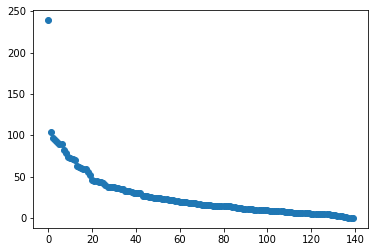

In [98]:
# s = np.random.exponential(61, 140)
# plt.scatter(range(len(s)), np.sort(s)[::-1]/np.sort(s)[::-1].max()*runs.max() )
s = np.random.power(61, 140)
plt.scatter(range(len(s)), (1- np.sort(s))/(1- np.sort(s)).max()*runs.max() )

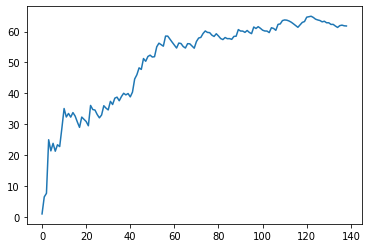

In [110]:
runs = 0
outs = 0
running_average = []
for i in batting['Runs'].dropna():
    if i != np.nan:
        if '*' not in i:
            runs+=float(i)
            outs+=1
            running_average.append(runs/outs)
        else:
            i_s = i.replace('*', '')
            runs+=float(i_s)
            running_average.append(runs/outs)
plt.plot(running_average)

In [133]:

def get_player_table():
    url = f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;template=results;type=aggregate;view=results"
    r = requests.get(url)
    if r.status_code == 404:
        raise 'page not found'
    else:
        soup = BeautifulSoup(r.text, 'html.parser')
        return soup



In [134]:
get_player_table()


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<!-- hostname: web06, edition-view: , country: unknown, cluster: www, created: 2021-01-26 08:44:39 -->
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://developers.facebook.com/schema/" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
<meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
<title>Aggregate/overall records | Test matches | Cricinfo Statsguru | ESPNcricinfo.com</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="" name="keywords"/>
<meta content="" name="description"/>
<!--[if IE 9]>
<script language="javascript" type="text/javascript">
function fnCreateJumpList(iScenario) {
fnClearJumpList();
window.external.msSiteModeCreateJumpList("Quick Links")
window.external.msSiteModeAddJu